# Ordinary Differential Equations (ODE) in Python
----

**ODEs** are used to describe the change of the **dynamic system** within the time or other single independent variable. In that case, we get a formula with **multiple variables dependent** on only **one independent variable**.

Solving the **ODE** equation gives information about the change in **dependent variables** as (i.e.) time goes by. This is sometimes referred to as the **solution curve**.


$$
\frac{dR}{dt}=k_0+k_1S-k_2R
$$
$$
\text{Formula 1: Example of an ODE}
$$

To illustrate how to solve ODEs with Python we will use the article [Tyson et al.(2003)](https://www.sciencedirect.com/science/article/abs/pii/S0955067403000176). This review focus on a mathematical representation of signaling pathways networks using positive and negative feedback.

Libraries used for solving ODEs and results visualization are called in the cell below

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Linear and hyperbolic signal-response curves
---
Using the law of mass action two equations can be used to describe protein: synthesis and degradation(*formula a*), phosphorylation and dephosphorylation (*formula b*).

 **Formula a:**
 
$$
\frac{dR}{dt}=k_0+k_1S-k_2R
$$

Where:
- **S** - signal strength (i.e. RNA concentration)
- **R** - response magnitude (i.e. protein concentration)

 **Formula b:**
 
$$
\frac{dR_P}{dt}=k_1S(R_T-R_P)-k_2R_P
$$

Where:
- **RP** - phosphorylated form of the response element(which is supposed to be the active form)
- $R_p=[RP]$  and $R_T=R+R_p=\text{total concentration of the response element}$

To calculate ODE with Python we use `odeint` from `scipy.integrate`. To correctly initiate the instance we need to prepare a model first as a Python function. That model will represent the equation that describes how values will change over time:

```{python}
def model(response,time,signal_strenght):
    ... # Constant parameters
    return equation
```

At first glance, the model might look odd, since the argument time does not present anywhere in the function body. However, we are not going to call this function, but pass it to `odeint` with the needed parameters. Used parameters values are taken from [Tyson et al.(2003)](https://www.sciencedirect.com/science/article/abs/pii/S0955067403000176) *(Box 1 Mathematical models of signal-response systems)*.

In [2]:
def synthesis_degradation_model(R,time,S):
    """
    Model of formula a, describing synthesis and degradation
    of the response element.
    """
    k0=0.01 # basal rate constant
    k1=1 # signal rate constant
    k2=5 # response element rate constant
    dRdt = k0+k1*S-k2*R
    return dRdt

def de_phosphorylation_model(Rp,time,S):
    """
    Model of formula b, describing phosphorylation/dephosphorylation
    of the response element.
    """
    k1=0.05 # signal rate constant
    k2=0.05 # response element rate constant
    Rt=1 # total concentration of response element
    dRpdt = k1*S*(Rt-Rp)-k2*Rp
    return dRpdt
    

`odeint` object takes three argument depending: `func`, `y0`,`t`. They stands for: model(which is in fact a mathematical function), value of the response element at time 0 (start). Additional arguments can be passed as well into `odeint` with an argument `args: tuple`)

In [3]:
S = 1 # Concentration of the signal element
time = np.linspace(0,200,200)
R0=[0, 0.3, 0.7, 1] # four different starting concnetration for Response element
Rp0=[0, 0.3, 0.7, 1] # four different starting concnetration for phosphorylated Response element

synthesis_degradation_ODE = odeint(synthesis_degradation_model,R0,time,args=(S,))
de_phosphorylation_ODE = odeint(de_phosphorylation_model, Rp0, time, args=(S,))

Computed `odeint` is an `numpy.ndarray`. By calling on its column, we can access the results of each starting concentration, we passed in.

In [4]:
print(type(synthesis_degradation_ODE))
print(synthesis_degradation_ODE.shape)

<class 'numpy.ndarray'>
(200, 4)


Having that in mind, we can plot change of the response element over time using `odeint`.

(0.0, 2.5)

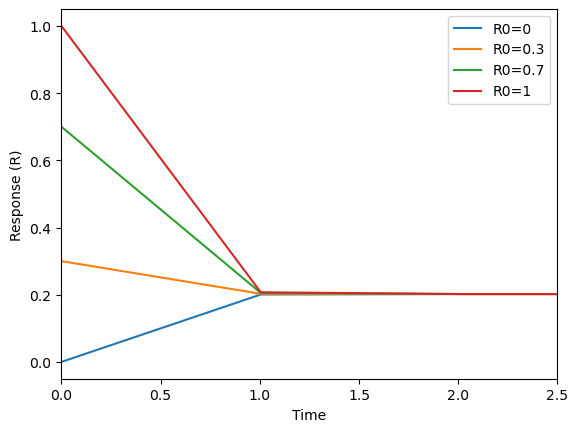

In [5]:
synthesis_degradation_ODE = odeint(synthesis_degradation_model,R0,time,args=(S,))
fig,ax = plt.subplots()
ax.plot(time,synthesis_degradation_ODE[:,0],label='R0=0')
ax.plot(time,synthesis_degradation_ODE[:,1],label='R0=0.3')
ax.plot(time,synthesis_degradation_ODE[:,2],label='R0=0.7')
ax.plot(time,synthesis_degradation_ODE[:,3],label='R0=1')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Response (R)')
ax.set_xlim(0,2.5)

The plot above demonstrates the change of the response element in time, for the synthesis/degradation model. Each line represents a different starting concentration of the response element. In the plot, each system achieves the steady state $\frac{dR}{dt}=0$ after 1.0 units of time and at a concentration of response unit equal to 0.2.

Text(0, 0.5, 'Response (Rp)')

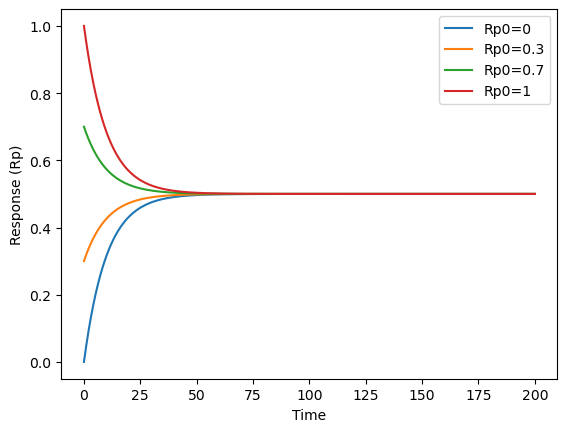

In [6]:
fig,ax = plt.subplots()
ax.plot(time,de_phosphorylation_ODE[:,0],label='Rp0=0')
ax.plot(time,de_phosphorylation_ODE[:,1],label='Rp0=0.3')
ax.plot(time,de_phosphorylation_ODE[:,2],label='Rp0=0.7')
ax.plot(time,de_phosphorylation_ODE[:,3],label='Rp0=1')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Response (Rp)')

The plot above demonstrates the change of the response element in time, for the phosphorylation/dephosphorylation model. Each line represents a different starting concentration of the response element. In the plot, each system achieves the steady state $\frac{dRp}{dt}=0$ after approximately 60 units of time and at a concentration of response unit equal to approximately 0.5.

### Response curves

Previously we demonstrated how the response changes over time for both types of reactions. Now we can determine how the *R* value in the steady state will change when *S* is changed. To obtain that we need to solve the root equation of the model function. For instance for synthesis/degradation such a formula would look like this:
$$
\frac{dR}{dt}=0
$$
$$
k_0+k_1S-k_2R=0
$$

The solution to that root equation will give a value of *R* at the steady state. To compute this equation we will use the `fsolve` function from `scipy.optimize `. It requires the following arguments: `func`, and `x0`, and accepts additional arguments in `args`. As you noticed it has a similar input structure as `odeint` but does not require time. From a reaction point of view, this value is not required, as the system is in the steady-state, thus response does not change over time.

By passing *S* as an array of values between 0 and 3 we will try to observe a signal-response curve presented in [Tyson et al.(2003)](https://www.sciencedirect.com/science/article/abs/pii/S0955067403000176) *(fig1, (a), right)*

In [7]:
S_range = np.linspace(0,3,100)

def synthesis_degradation_equation(R,S):
    """
    Model of formula a, describing synthesis and degradation
    of the response element.
    """
    k0=0.01 # basal rate constant
    k1=1 # signal rate constant
    k2=5 # response element rate constant
    return k0+k1*S-k2*R

solution = []
for S in S_range:
    R = fsolve(synthesis_degradation_equation,[1],args=(S,))[0]
    solution.append(R)

Text(0, 0.5, 'Response(R)')

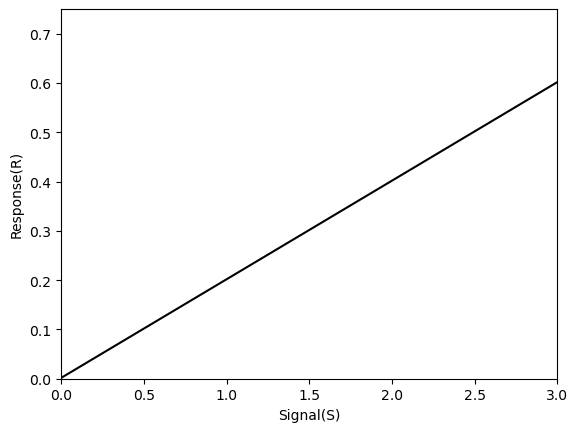

In [8]:
fig,ax = plt.subplots()
ax.plot(S_range,solution,c='k')
ax.set_xlim(0,3)
ax.set_xlabel('Signal(S)')
ax.set_ylim(0,0.75)
ax.set_ylabel('Response(R)')

In [9]:
def de_phosphorylation_equation(Rp,S):
    """
    Model of formula b, describing phosphorylation/dephosphorylation
    of the response element.
    """
    k1=1 # signal rate constant
    k2=1 # response element rate constant
    Rt=1 # total concentration of response element
    return k1*S*(Rt-Rp)-k2*Rp

S_range = np.linspace(0,10,100)
solution = []
for S in S_range:
    Rp = fsolve(de_phosphorylation_equation,[1],args=(S,))[0]
    solution.append(Rp)

Text(0, 0.5, 'Response(R)')

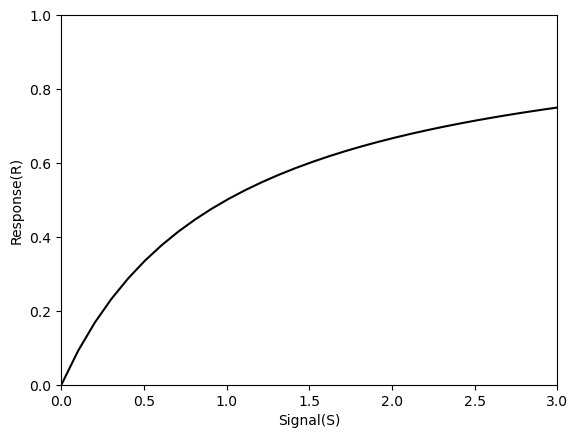

In [10]:
fig,ax = plt.subplots()
ax.plot(S_range,solution,c='k')
ax.set_xlim(0,3)
ax.set_xlabel('Signal(S)')
ax.set_ylim(0,1)
ax.set_ylabel('Response(R)')

# Sigmoidal signal-response curves
---

Previously demonstrated equations describing phosphorylation/dephosphorylation can be modified to fulfill Michaelis-Menten kinetics. In that case from the equation:

$$
\frac{dR_P}{dt}=k_1S(R_T-R_P)-k_2R_P
$$

The following equation is gained:

$$
\frac{dR_P}{dt}=\frac{k_1S(R_T-R_P)}{k_{m1}+R_T-R_P}-\frac{k_2R_P}{k_{m2}+R_P}
$$

In [11]:
def mich_ment_de_phosphorylation_equation(Rp,S):
    """
    Model of formula b, describing phosphorylation/dephosphorylation
    of the response element.
    """
    k1=1 # signal rate constant
    k2=1 # response element rate constant
    Rt=1 # total concentration of response element
    km1=0.05
    km2=0.05
    return((k1*S*(Rt-Rp))/(km1+Rt-Rp))-((k2*Rp)/(km2+Rp))
    #return k1*S*(Rt-Rp)-k2*Rp

S_range = np.linspace(0,3,100)
solution = []
for S in S_range:
    Rp = fsolve(mich_ment_de_phosphorylation_equation,[1],args=(S,))[0]
    solution.append(Rp)

Text(0, 0.5, 'Response(R)')

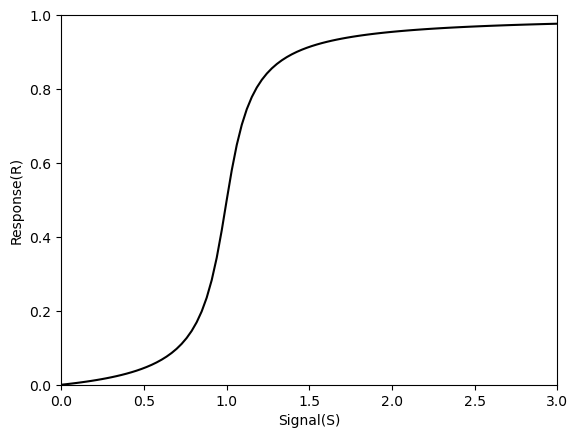

In [12]:
fig,ax = plt.subplots()
ax.plot(S_range,solution,c='k')
ax.set_xlim(0,3)
ax.set_xlabel('Signal(S)')
ax.set_ylim(0,1)
ax.set_ylabel('Response(R)')

# Summary
___

As shown above calculating ODEs in Python is relatively easy. It requires `odeint`, from `scipy.integrate`, a model (equation), that we defined as a python function, time as `list` or `np.array`, and `y0`. Having that in we can obtain a plot describing how the systems behave over time. It can be seen that after some time each system reaches the so-called **steady-state**, where response values do not change, despite passing time.

From a mathematical perspective, a **steady-state** occurs when the solution (change over time) of the equation equals zero. Thus by solving that root equation we can obtain values of the response, at given parameters. This concept can be expanded to a determination of the response under different conditions (parameter values). In the context of biological reactions, we can obtain a response curve that way. Such a curve displays how the response value at steady-state changes when some other parameter is changed (i.e. concentration of RNA for protein synthesis). To solve the root equation `fsolve` function from `scipy.optimize` can be used, following a similar input scheme as `odeint`, except it does not take `time`.

To solve more complicated differential equations `gekko` library is required, which enables solving an equation for a system that has multiple components.